In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
%matplotlib inline

# 1. Читаем данные

Возьмем данные из первой лабораторной, которые уже были обработаны(удалены выбросы, обработаны пропущенные значения, категоральные и бинарные признаки, а также проведена нормализация)

In [20]:
data = pd.read_csv('file_w.csv', delimiter=',')
data.shape

(43411, 49)

In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data

,Age,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown.3
0,0.654545,0.0,0.159682,0.0,0.0,0.133333,0.169571,0.00,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.400000,0.0,0.047533,0.0,0.0,0.133333,0.095845,0.00,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.200000,0.0,0.046101,0.0,1.0,0.133333,0.045576,0.00,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.454545,0.0,0.125889,0.0,0.0,0.133333,0.056300,0.00,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.200000,0.0,0.046048,1.0,0.0,0.133333,0.127346,0.00,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43406,0.527273,0.0,0.089761,1.0,0.0,0.533333,0.649464,0.10,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43407,0.890909,0.0,0.137719,1.0,0.0,0.533333,0.300268,0.05,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43408,0.909091,0.0,0.349178,1.0,0.0,0.533333,0.750000,0.20,0.450122,0.250000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43409,0.636364,0.0,0.081432,1.0,0.0,0.533333,0.335121,0.15,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
data.columns

Index(['Age', 'Credit', 'Balance (euros)', 'Housing Loan', 'Personal Loan',
       'Last Contact Day', 'Last Contact Duration', 'Campaign', 'Pdays',
       'Previous', 'Subscription', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married',
       'single', 'primary', 'secondary', 'tertiary', 'unknown.1', 'cellular',
       'telephone', 'unknown.2', 'apr', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure', 'other', 'success',
       'unknown.3'],
      dtype='object')

In [24]:
data.describe()

,Age,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown.3
count,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000,...,43411.000000,43411.000000,43411.000000,43411.000000,43411.00000,43411.000000,43411.000000,43411.000000,43411.000000,43411.000000
mean,0.342540,0.016862,0.111525,0.441432,0.160443,0.492488,0.163247,0.082241,0.093059,0.040744,...,0.118150,0.010136,0.308332,0.087927,0.01472,0.011011,0.105711,0.037986,0.032250,0.824054
std,0.186195,0.128756,0.114604,0.496564,0.367021,0.276863,0.152151,0.125717,0.226678,0.116675,...,0.322789,0.100166,0.461810,0.283192,0.12043,0.104355,0.307470,0.191164,0.176665,0.380779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.049920,0.000000,0.000000,0.233333,0.064343,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.309091,0.000000,0.069708,0.000000,0.000000,0.500000,0.115282,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.472727,0.000000,0.120584,1.000000,0.000000,0.666667,0.207105,0.100000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data['Subscription'] = data['Subscription'].astype('bool')
data['Subscription'] 

0        False
1        False
2        False
3        False
4        False
         ...  
43406     True
43407     True
43408     True
43409    False
43410    False
Name: Subscription, Length: 43411, dtype: bool

In [8]:
for c in data.columns:
    print(data[c].dtype.name)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
bool
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


# 2. Разбиваем датасет на обучающую и тестовую выборки

In [9]:
X = data.drop('Subscription', axis = 1) # выбрасываем столбец 'Subscription'
y = data['Subscription'] # создаём вектор значений столбца 'Subscription'


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

29085 14326


In [11]:
from sklearn.neural_network import MLPClassifier

# 3. Создаём модель и обучаем её

In [12]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=1000,
                          random_state = 30)

In [13]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 55.1 s


MLPClassifier(max_iter=1000, random_state=30)

In [14]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [15]:
np.mean(y_test)

0.11210386709479268

In [16]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.04277118789754169 0.10798548094373865


In [25]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 95.72% TEST: 89.20%


# 4. Подбор оптимального альфа

Попробуем подобрать параметры регуляризации alpha

In [26]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 3, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

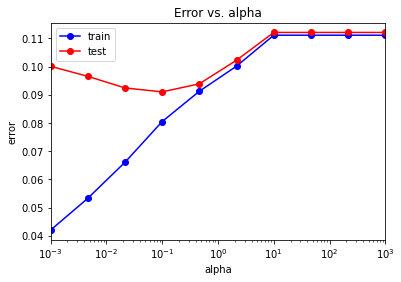

In [27]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

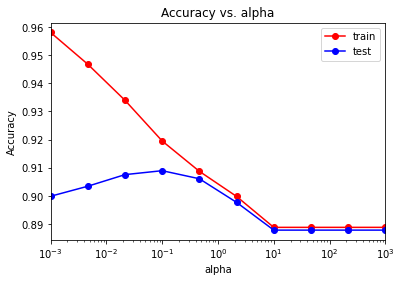

In [28]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графика видно, что при малых значениях параметра регуляризации alpha (примерно < 10) наблюдается переобучение. Начиная с оптимального значения парамера, точность на тествой и на обучающей выборке примерно совпадают. При дальнейшем увеличении alpha точность уменьшается, то есть наблюдается недообучение.

Найдём минимальное значение ошибки:

In [29]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("TRAIN:", min_train_err, "TEST:", min_test_err)

TRAIN: 0.04198040226921093 TEST: 0.09102331425380428


И найдём оптимальное значение alpha:

In [30]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1]


Запустим классификатор при найденом значении alpha_opt

In [31]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.08048822417053464
0.09102331425380428


In [32]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 91.95% TEST: 90.90%


# 5. Подбор оптимального числа нейронов

In [33]:
neuron_arr = np.linspace(10, 300, 30).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

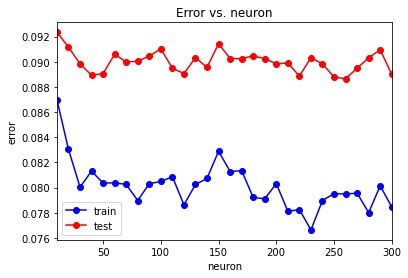

In [34]:
plt.plot(neuron_arr, train_err, 'b-o', label = 'train')
plt.plot(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()

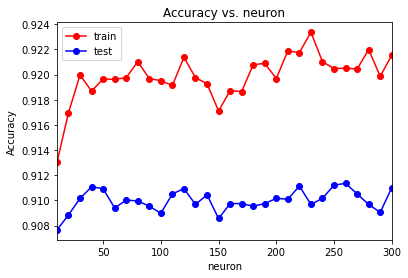

In [35]:
plt.plot(neuron_arr, train_acc, 'r-o', label = 'train')
plt.plot(neuron_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

In [36]:
min_test_err = np.min(test_err)
neuron_opt = neuron_arr[test_err == min_test_err][0]
print('Optimal neuron count: {}'.format(neuron_opt))

Optimal neuron count: 260


Мы видим, что явная зависимость между количеством нейронов и точностью не наблюдается

Запустим классификатор при найденом значении neuron_opt

In [37]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.08045384218669417
0.09011587323747033


In [38]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 91.95% TEST: 90.99%


# 6. Подбор оптимального альфа и числа нейронов

In [39]:
neuron_arr = np.linspace(10, 300, 5).astype(int)
alpha_arr = np.logspace(-3, 3, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []
pars_arr = []

for neuron in neuron_arr:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neuron,), 
                                  solver = 'adam', activation = 'relu', max_iter=1000, random_state = 20)
        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
    
        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        pars_arr.append([neuron, alpha])

In [40]:
min_test_err = np.min(test_err)
i, = np.where(test_err == min_test_err)
neuron_opt, alpha_opt = pars_arr[i[0]]
print("Neuron count opt:", neuron_opt)
print("Alpha opt: ", alpha_opt)

Neuron count opt: 10
Alpha opt:  0.001


In [41]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(neuron_opt,),
                          solver='adam', activation='relu', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0839264225545814
0.09241937735585648


In [42]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 91.61% TEST: 90.76%


# 7. Вывод

- При изменении параметра регуляризации мы смогли изменить точность выборок. При выборе оптимального параметра alpha мы избавились от эффекта переобучения, повысили точность тестовой выборки и уменьшили разность между точностью выборок.
- Подбор оптимального числа нейронов при оптимальном значении регулярации, немного повысил точность на тестовой выборке.
- При одноверенном подборе обоих параметров точность на обучающей и тестовой выборке немного теряется.